**Ciencia y analítica de datos**

Carlos Álvarez

Regresión Lineal

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
os.chdir(DIR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [3]:
# Extraemos las columnas numéricas del df
numeric_cols_names_list = [col  for col in insurance_df.columns if insurance_df[col].dtype in ['int64', 'float64']]
# Extraemos las columnas NO numéricas del df
non_numeric_cols_names_list = [col  for col in insurance_df.columns if insurance_df[col].dtype not in ['int64', 'float64']]

In [4]:
print(f"""
      El dataframe de seguros cuenta con:
      
            * COLUMNAS: {list(insurance_df.columns)}
            * TOTAL DE COLUMNAS: {len(insurance_df.columns)}
      
      De las cuales:
      
            * COLUMNAS NÚMERICAS: {numeric_cols_names_list}
            * COLUMNAS NÚMERICAS #: {len(numeric_cols_names_list)}
            
            * COLUMNAS NO NÚMERICAS: {non_numeric_cols_names_list}
            * COLUMNAS NO NÚMERICAS #: {len(non_numeric_cols_names_list)}
      """)


      El dataframe de seguros cuenta con:
      
            * COLUMNAS: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
            * TOTAL DE COLUMNAS: 7
      
      De las cuales:
      
            * COLUMNAS NÚMERICAS: ['age', 'bmi', 'children', 'charges']
            * COLUMNAS NÚMERICAS #: 4
            
            * COLUMNAS NO NÚMERICAS: ['sex', 'smoker', 'region']
            * COLUMNAS NO NÚMERICAS #: 3
      


In [5]:
insurance_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


1b) Búsqueda de valores faltantes.

In [6]:
# Calculamos el % de valores nulos por columna
pd.DataFrame((insurance_df.isna().sum() / insurance_df.shape[0]) * 100, columns=["Porcentaje de Valores Faltantes"])

,Porcentaje de Valores Faltantes
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
charges,0.0


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

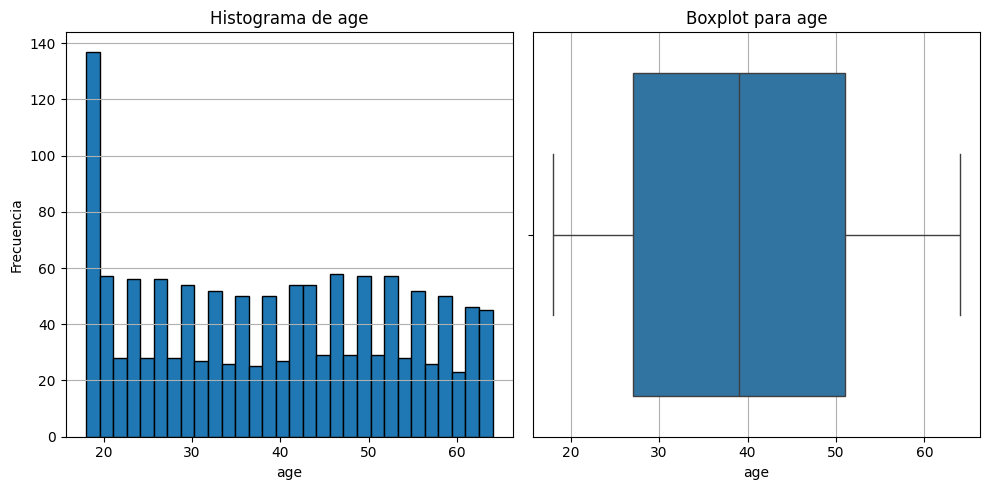

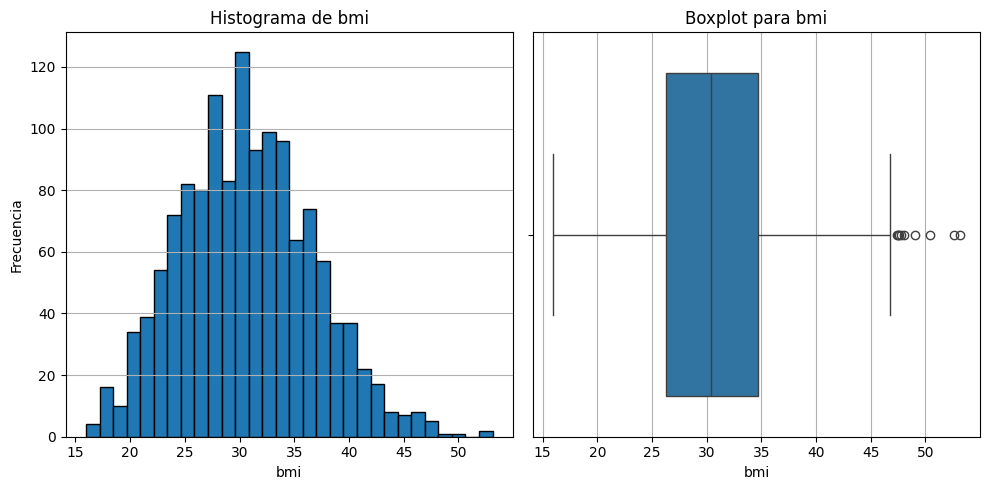

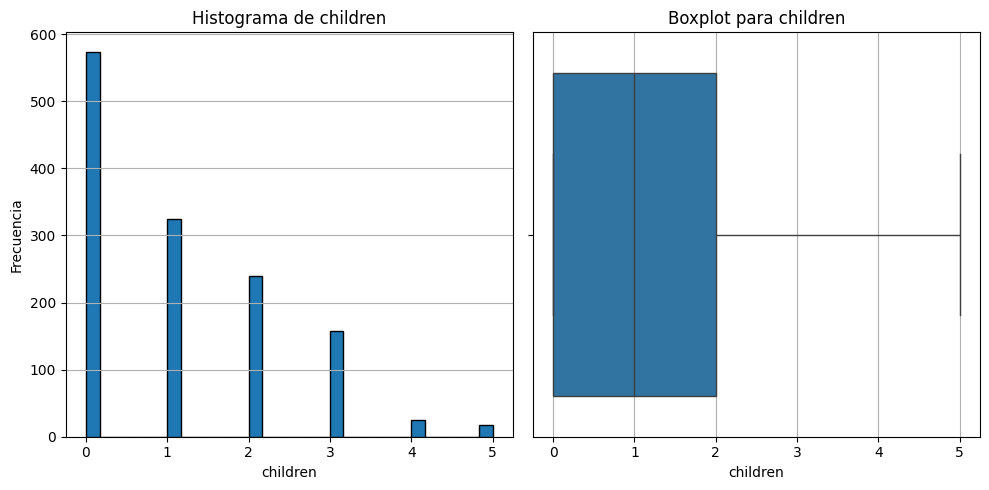

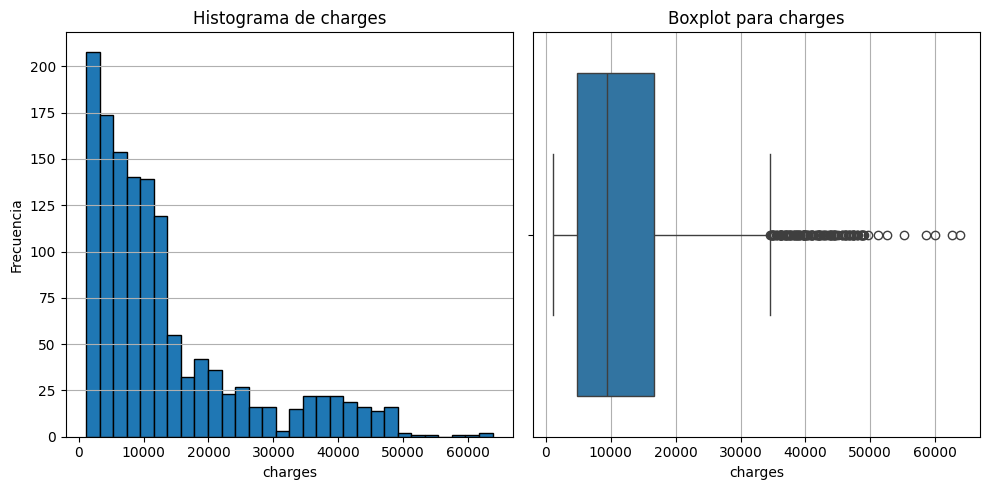

In [7]:
for col_ in numeric_cols_names_list:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    insurance_df[col_].plot(kind='hist', bins=30, edgecolor='k', ax=axes[0])
    axes[0].set_title(f'Histograma de {col_}')
    axes[0].set_xlabel(col_)
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(axis='y')
    sns.boxplot(data=insurance_df, x=col_, ax=axes[1])
    axes[1].set_title(f'Boxplot para {col_}')
    axes[1].grid(axis="x")
    plt.tight_layout()
    plt.show()

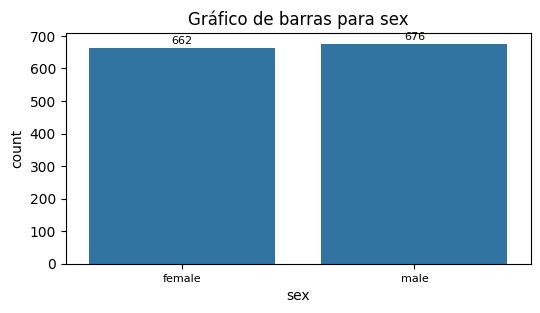

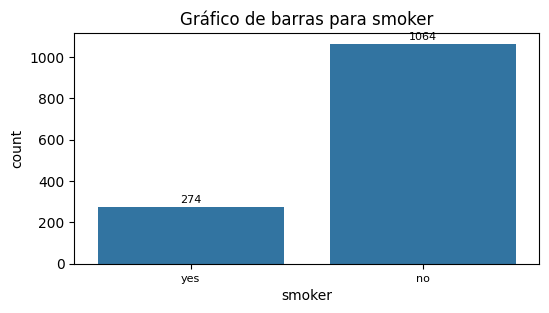

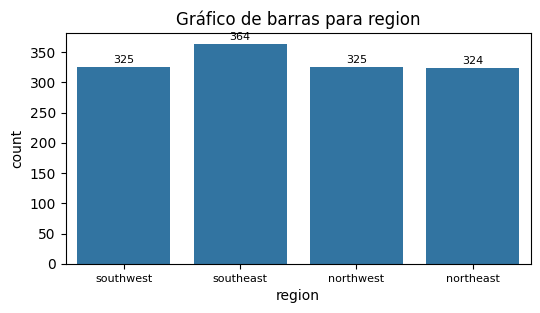

In [8]:
for cat_var in non_numeric_cols_names_list:
    plt.figure(figsize=(6, 3))
    ax = sns.countplot(data=insurance_df, x=cat_var)
    ax.tick_params(axis='x', labelsize=8)
    ax.set_title(f"Gráfico de barras para {cat_var}")

    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            xytext=(0, 5), 
            textcoords='offset points',
            fontsize=8
        )

    plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

In [9]:
list(insurance_df.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

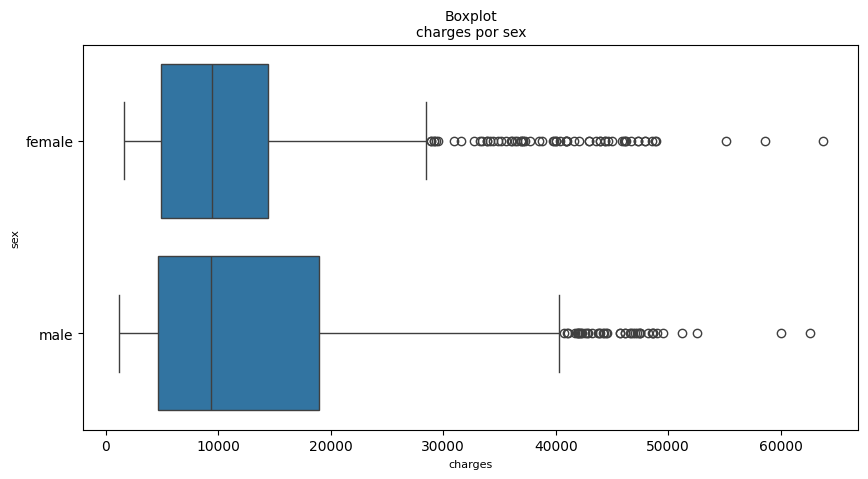

In [10]:
boxplot_variables = ["sex", "charges"]
plt.figure(figsize=(10,5))
sns.boxplot(x=boxplot_variables[1], y=boxplot_variables[0], data=insurance_df)
plt.xlabel(boxplot_variables[1], fontsize=8)
plt.ylabel(boxplot_variables[0], fontsize=8)
plt.title(f'Boxplot\n{boxplot_variables[1]} por {boxplot_variables[0]}', fontsize=10)
plt.show()

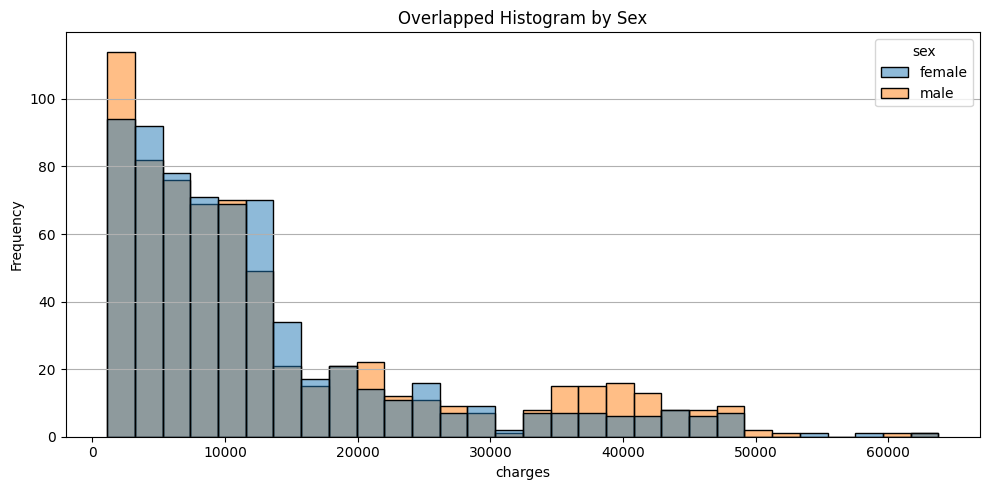

In [11]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=insurance_df, x="charges", hue='sex', multiple='layer', bins=30, alpha=0.5, ax=ax)
ax.set_title('Overlapped Histogram by Sex')
ax.set_xlabel("charges")
ax.set_ylabel('Frequency')
ax.grid(axis='y')
plt.tight_layout()
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

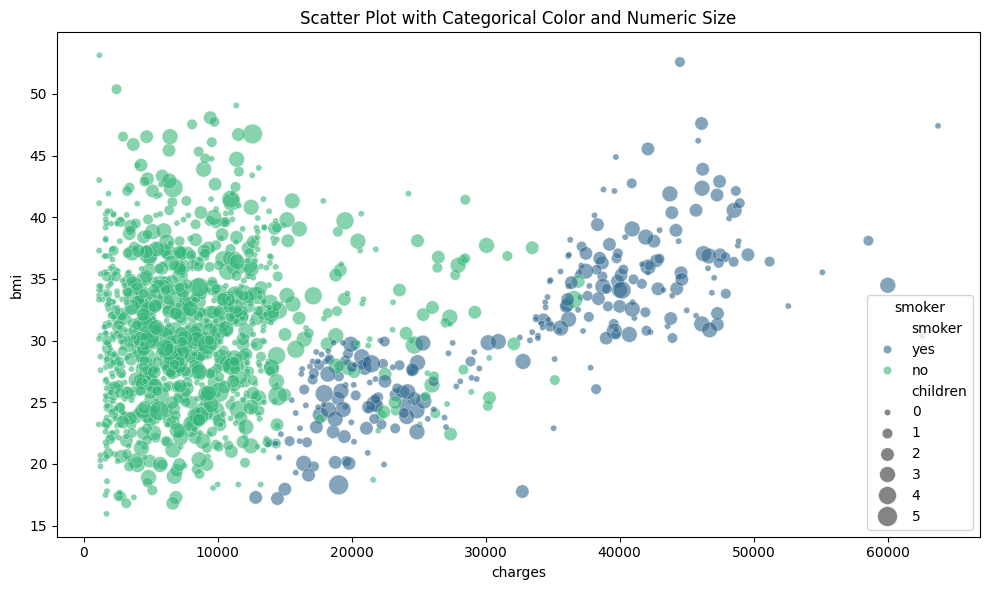

In [12]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=insurance_df, x="charges", y="bmi", hue="smoker", size="children", sizes=(20, 200), alpha=0.6, palette='viridis')
scatter.set_title('Scatter Plot with Categorical Color and Numeric Size')
scatter.set_xlabel("charges")
scatter.set_ylabel("bmi")
scatter.legend(title="smoker")
plt.tight_layout()
plt.show()

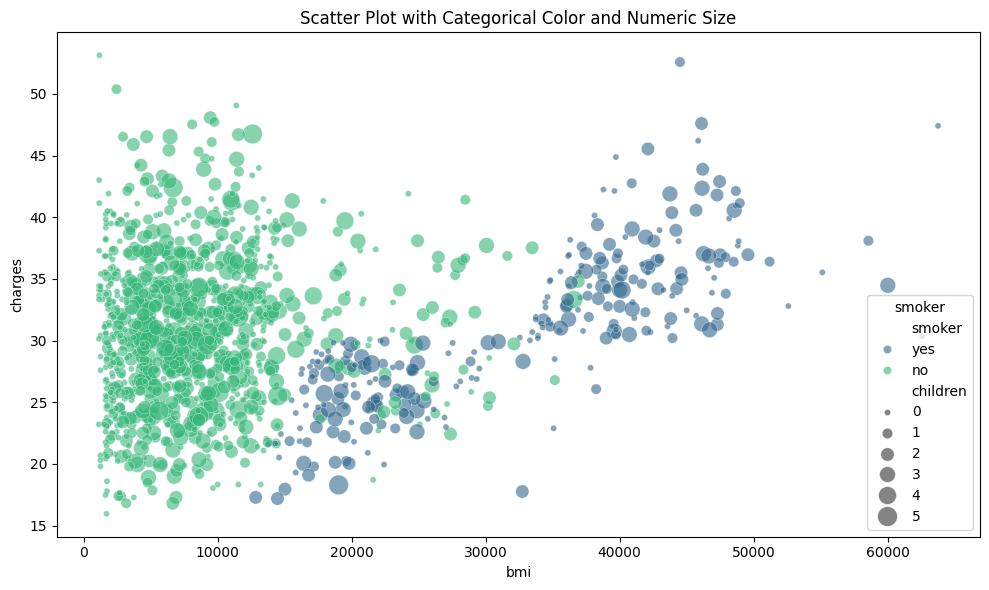

In [13]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=insurance_df, x="charges", y="bmi", hue="smoker", size="children", sizes=(20, 200), alpha=0.6, palette='viridis')
scatter.set_title('Scatter Plot with Categorical Color and Numeric Size')
scatter.set_xlabel("bmi")
scatter.set_ylabel("charges")
scatter.legend(title="smoker")
plt.tight_layout()
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

In [14]:
# Calculamos la matriz de correlación
corr_df = insurance_df[numeric_cols_names_list].corr()

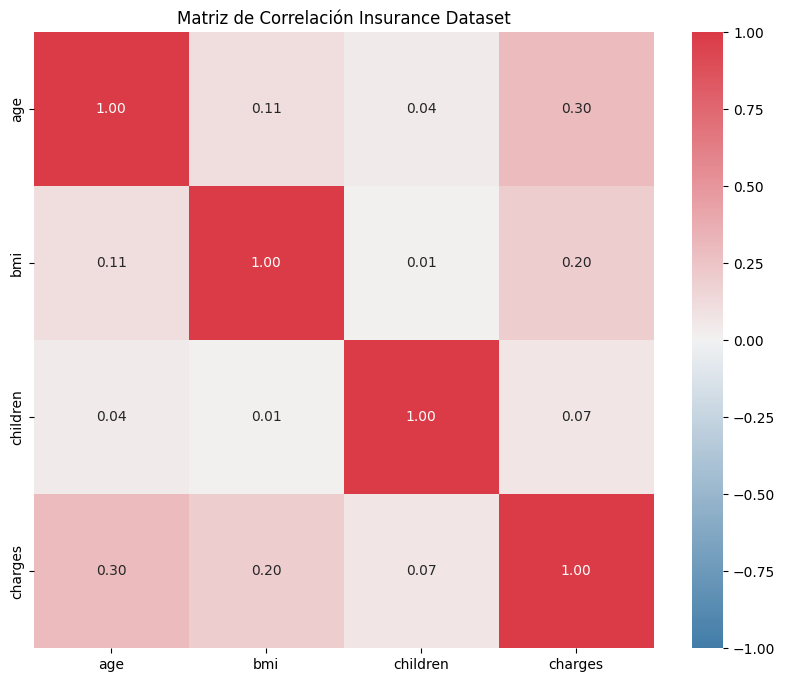

In [15]:
# Para el tamaño del gráfico
plt.figure(figsize=(10, 8))  

# Para crear un paleta de colores divergente
cmap = sns.diverging_palette(240, 10, as_cmap=True) 

# Para le divergencia de los colores
vmin = -1 # Para que la diveregencia de los colores esten en función de un valor mínimo
vmax = 1 # Para que la diveregencia de los colores esten en función de un valor máximo

# Generamos el gráfico
sns.heatmap(corr_df, 
            cmap=cmap, # La paleta de coores diveregente
            vmin=vmin, # El valor mínimo de diveregencia de color
            vmax=vmax, # El valor máximo de diveregencia de color
            xticklabels=corr_df.columns, # Las etiquetas del eje x
            yticklabels=corr_df.columns,# Las etiquetas del eje y
            center=0, annot=True, fmt=".2f", # Para añadir los valores a la matriz dibujada
            )
# Título del gráfico
plt.title(f'Matriz de Correlación Insurance Dataset', fontsize=12)
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [16]:
charges_percentile_25 = insurance_df["charges"].quantile(0.25)
charges_percentile_75 = insurance_df["charges"].quantile(0.75)
charges_iqr = charges_percentile_75 - charges_percentile_25
charges_upper_limit = charges_percentile_75 + (1.5 * charges_iqr)
charges_lower_limit = charges_percentile_25 - (1.5 * charges_iqr)

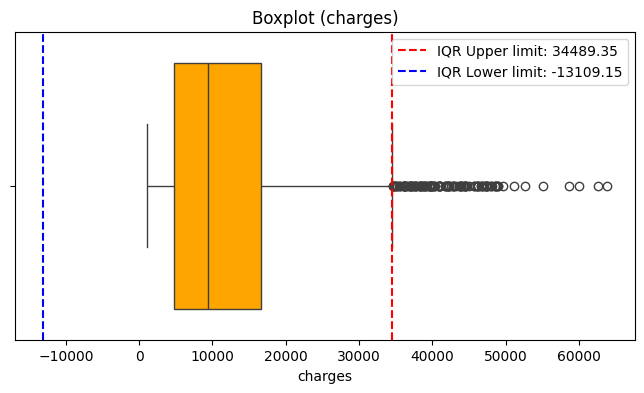

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(data=insurance_df, x="charges", boxprops = {"facecolor": "orange"})
plt.axvline(x=charges_upper_limit, color='r', linestyle='--', label=f'IQR Upper limit: {charges_upper_limit:.2f}')
plt.axvline(x=charges_lower_limit, color='b', linestyle='--', label=f'IQR Lower limit: {charges_lower_limit:.2f}')
plt.title('Boxplot (charges)')
plt.legend()
plt.show()

In [18]:
charges_IQR_outliers = insurance_df[(insurance_df["charges"] < charges_lower_limit) | (insurance_df["charges"] > charges_upper_limit)]
charges_IQR_outliers.shape[0]

139

In [19]:
# Ahora generamos un nuevo dataframe que NO contiene los valores atípicos de la variable 
outliers_charges_indexes = charges_IQR_outliers.index
charges_outliers_df = insurance_df.loc[outliers_charges_indexes].copy().reset_index(drop=True)

In [20]:
# Calculamos los promedios
print("El promedio de age: {:.2f}".format(charges_outliers_df['age'].mean()))
print("El promedio de bmi: {:.2f}".format(charges_outliers_df['bmi'].mean()))

El promedio de age: 41.08
El promedio de bmi: 35.56


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

Text(0, 0.5, 'conteo')

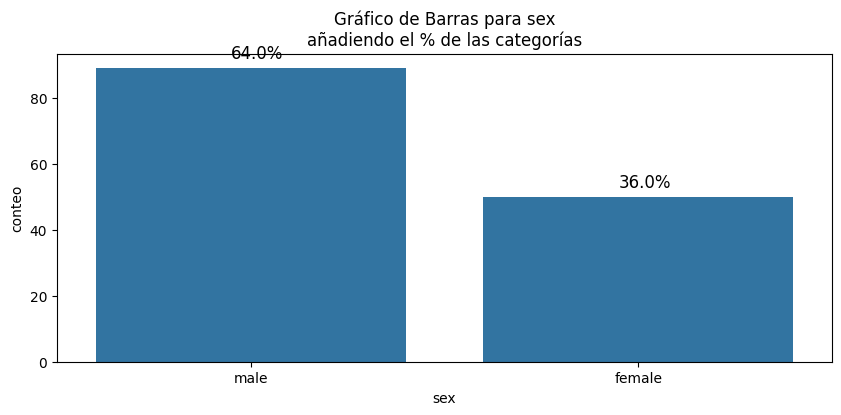

In [21]:
# Create the count plot
plt.figure(figsize=(10, 4))
count_plot = sns.countplot(data=charges_outliers_df, x="sex")

# Calculate percentages
total = len(charges_outliers_df["sex"])
for p in count_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 3
    count_plot.annotate(percentage, (x, y), size=12)

# Set titles and labels
count_plot.set_title('Gráfico de Barras para sex\nañadiendo el % de las categorías')
count_plot.set_xlabel("sex")
count_plot.set_ylabel('conteo')

Text(0, 0.5, 'conteo')

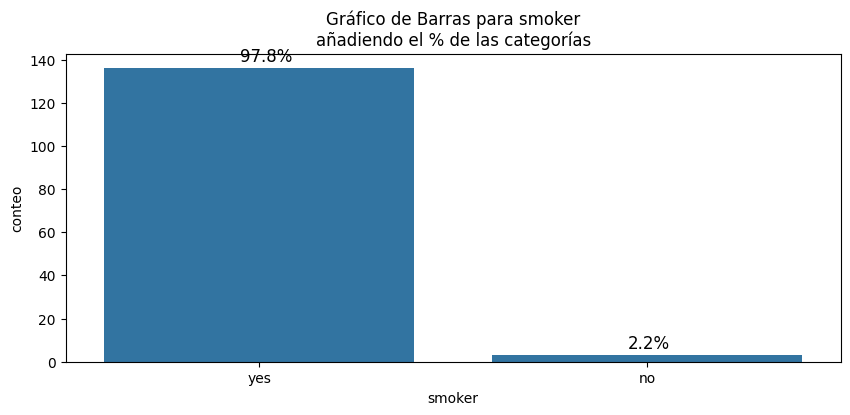

In [22]:
# Create the count plot
plt.figure(figsize=(10, 4))
count_plot = sns.countplot(data=charges_outliers_df, x="smoker")

# Calculate percentages
total = len(charges_outliers_df["smoker"])
for p in count_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 3
    count_plot.annotate(percentage, (x, y), size=12)

# Set titles and labels
count_plot.set_title('Gráfico de Barras para smoker\nañadiendo el % de las categorías')
count_plot.set_xlabel("smoker")
count_plot.set_ylabel('conteo')

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [23]:
X = insurance_df[[x for x in insurance_df.columns if x != "charges"]]
y = insurance_df[["charges"]]

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, stratify=X['smoker'], random_state=1
)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [28]:
preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [x for x in numeric_cols_names_list if x!="charges"]),
        ('cat', OneHotEncoder(), non_numeric_cols_names_list)
    ])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

lr_model = make_pipeline(preprocessing, LinearRegression())

In [33]:
lr_model.fit(X=Xtrain, y=ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [34]:
ypred = lr_model.predict(Xtest)

In [36]:
from sklearn.metrics import root_mean_squared_error
lr_model_rmse = root_mean_squared_error(y_true=ytest, y_pred=ypred)
lr_model_rmse

5736.110786596137

In [38]:
from sklearn.metrics import r2_score
lr_model_r2 = r2_score(ytest, ypred)
lr_model_r2

0.750617560380691

**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [39]:
ytrain["charges"] = ytrain["charges"].map(lambda x: charges_upper_limit if x > charges_upper_limit else x)
ytest["charges"] = ytest["charges"].map(lambda x: charges_upper_limit if x > charges_upper_limit else x)

In [40]:
lr_model2 = make_pipeline(preprocessing, LinearRegression())

In [41]:
lr_model2.fit(X=Xtrain, y=ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [42]:
ypred_model2 = lr_model2.predict(Xtest)

In [43]:
lr_model2_rmse = root_mean_squared_error(y_true=ytest, y_pred=ypred_model2)
lr_model2_rmse

4835.348657819692

In [44]:
lr_model2_r2 = r2_score(ytest, ypred_model2)
lr_model2_r2

0.7614858105912878

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [45]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [46]:
# Define the ColumnTransformer
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [x for x in numeric_cols_names_list if x!="charges"]),
        ('cat', OrdinalEncoder(), non_numeric_cols_names_list)
    ])

In [47]:
lr_model3 = make_pipeline(preprocessing2, LinearRegression())

In [48]:
lr_model3.fit(X=Xtrain, y=ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [49]:
ypred_model3 = lr_model3.predict(Xtest)

In [50]:
lr_model3_rmse = root_mean_squared_error(y_true=ytest, y_pred=ypred_model3)
lr_model3_rmse

4811.600670456455

In [51]:
lr_model2_r2 = r2_score(ytest, ypred_model3)
lr_model2_r2

0.7638229005936741

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [52]:
from sklearn.preprocessing import PolynomialFeatures

### Con OnehotEncoder

In [53]:
# Define the ColumnTransformer
preprocessing4 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [x for x in numeric_cols_names_list if x!="charges"]),
        ('cat', OneHotEncoder(), non_numeric_cols_names_list)
    ])

Best degree 2 with RMSE 65.68970013165914


Text(0, 0.5, 'RMSE')

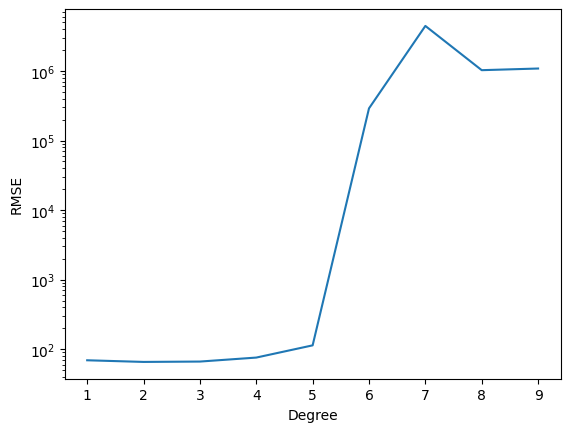

In [54]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_reg_model = make_pipeline(preprocessing4, PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    poly_reg_model.fit(Xtrain, ytrain)
    poly_reg_y_predicted = poly_reg_model.predict(Xtest)

    poly_reg_rmse = np.sqrt(root_mean_squared_error(ytest, poly_reg_y_predicted))    
    rmses.append(poly_reg_rmse)

    # Cross-validation of degree
    if min_rmse > poly_reg_rmse:
        min_rmse = poly_reg_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
plt.plot(degrees, rmses)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('RMSE')

### Con OrdinalEncoder

In [55]:
# Define the ColumnTransformer
preprocessing5 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [x for x in numeric_cols_names_list if x!="charges"]),
        ('cat', OrdinalEncoder(), non_numeric_cols_names_list)
    ])

Best degree 2 with RMSE 65.46426743625531


Text(0, 0.5, 'RMSE')

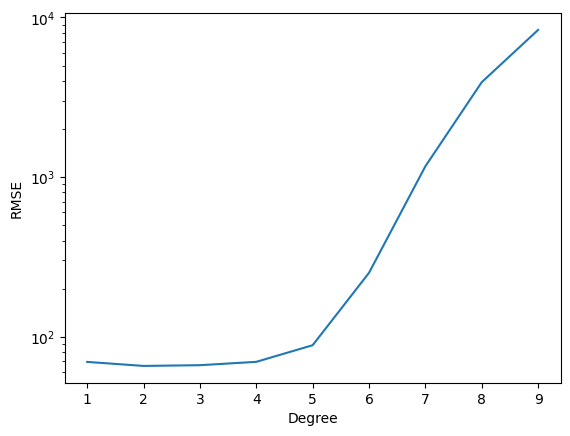

In [56]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_reg_model = make_pipeline(preprocessing5, PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    poly_reg_model.fit(Xtrain, ytrain)
    poly_reg_y_predicted = poly_reg_model.predict(Xtest)

    poly_reg_rmse = np.sqrt(root_mean_squared_error(ytest, poly_reg_y_predicted))    
    rmses.append(poly_reg_rmse)

    # Cross-validation of degree
    if min_rmse > poly_reg_rmse:
        min_rmse = poly_reg_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
plt.plot(degrees, rmses)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('RMSE')